In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import os
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt

from scripts.load_aggregated_results import PLOT_DIR, DIS_METRICS, HUMAN_READABLE_NAMES, get_metric_df

In [3]:
if not 'workbook_dir' in globals():
    workbook_dir = os.getcwd()
    os.chdir(Path(workbook_dir).parent.parent)
print('workbook_dir: ' + workbook_dir)
print('current dir: ' + os.getcwd())

workbook_dir: /home/alek/PycharmProjects/disentanglement_lib/plots/notebooks
current dir: /home/alek/PycharmProjects/disentanglement_lib


In [4]:
df = pd.read_pickle(PLOT_DIR / 'hnlpca_results.pickle')

In [5]:
intrinsic_datasets = (
    'color_dsprites', 
    'scream_dsprites', 
    'smallnorb',
)
for dataset in df['train_config.dataset.name'].unique():
    if dataset.replace("'", '') in intrinsic_datasets:
        continue
    
    for group_id in (
        'hnlpca',
        'hnlpca_balanced',
    ):
        new_rows = df.loc[
            (df['train_config.dataset.name'] == dataset) &
            (df['group_id'] == group_id)
        ].copy()
        new_rows['group_id'] += '_intrinsic'
        
        df.append(new_rows)

In [6]:
df_contribs = pd.read_csv(PLOT_DIR / 'contribs_full_color_dims.csv')

In [7]:
df['dataset_std'] = df.apply(lambda row: float(df_contribs.loc[df_contribs['dataset'] == row['train_config.dataset.name'].replace("'", '')]['std']), axis=1)
df['dataset_std_all'] = df.apply(lambda row: float(df_contribs.loc[df_contribs['dataset'] == row['train_config.dataset.name'].replace("'", '')]['all_std']), axis=1)
df_ = df.copy()

In [8]:
df['group_id'].unique()

array(['annealed_10.0', 'annealed_100.0', 'annealed_25.0', 'annealed_5.0',
       'annealed_50.0', 'annealed_75.0', 'beta_vae_1.0', 'hnlpca',
       'hnlpca_balanced', 'hnlpca_balanced_intrinsic', 'hnlpca_intrinsic'],
      dtype=object)

In [9]:
def get_corrs(group_id):
    df = df_.copy()
    df = df.loc[df['group_id'] == group_id]
    
    corrs = {}
    for metric in DIS_METRICS:
        df_metric, metric_col_name = get_metric_df(df, metric)
        corrs[HUMAN_READABLE_NAMES[metric]] = df_metric[[metric_col_name, 'dataset_std_all']].corr()[metric_col_name]['dataset_std_all']
        
    return corrs
    

In [10]:
for group_id in df_['group_id'].unique():
    print(group_id)
    print(get_corrs(group_id))

annealed_10.0
{'FactorVAE Score': 0.2488306939736369, 'MIG': 0.3591015926326842, 'DCI Disentanglement': 0.34121512087663275, 'Modularity': 0.6310709178643148, 'SAP Score': 0.5603439769049379}
annealed_100.0
{'FactorVAE Score': 0.3882883743447302, 'MIG': 0.211080926295496, 'DCI Disentanglement': 0.6101181937411189, 'Modularity': 0.554452071933464, 'SAP Score': 0.40789999564515583}
annealed_25.0
{'FactorVAE Score': 0.39909847025527656, 'MIG': 0.3645278478727176, 'DCI Disentanglement': 0.42090617877593406, 'Modularity': 0.5833247883252188, 'SAP Score': 0.6065056419250123}
annealed_5.0
{'FactorVAE Score': 0.20077253257280872, 'MIG': 0.27144229927682045, 'DCI Disentanglement': 0.1907479015309365, 'Modularity': 0.6426835939249723, 'SAP Score': 0.5065047645199582}
annealed_50.0
{'FactorVAE Score': 0.43532754558948017, 'MIG': 0.4045616046081797, 'DCI Disentanglement': 0.6487612000666916, 'Modularity': 0.554910237724022, 'SAP Score': 0.509093657295202}
annealed_75.0
{'FactorVAE Score': 0.390517

In [11]:
def plot_violin(group_id):
    df = df_.copy()
    df = df.loc[df['group_id'] == group_id]
    
    for metric in DIS_METRICS:
        df_metric, metric_col_name = get_metric_df(df, metric)
        sns.violinplot(
            data=df_metric,
            x='dataset_std_all',
            y=metric_col_name,
            hue='train_config.dataset.name',
        )
        plt.show()
        

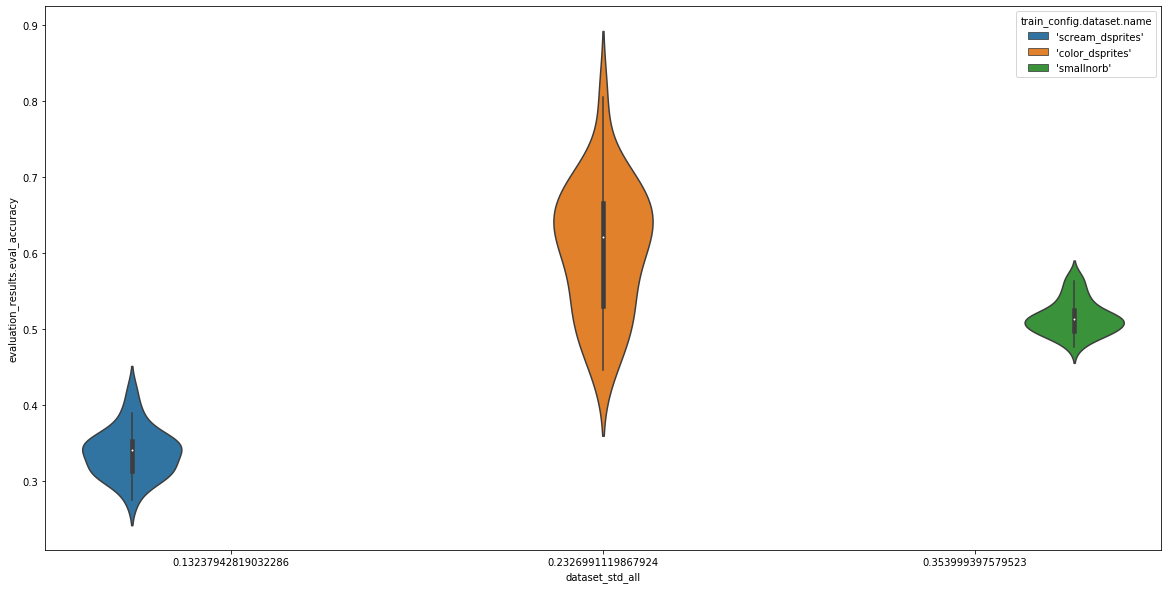

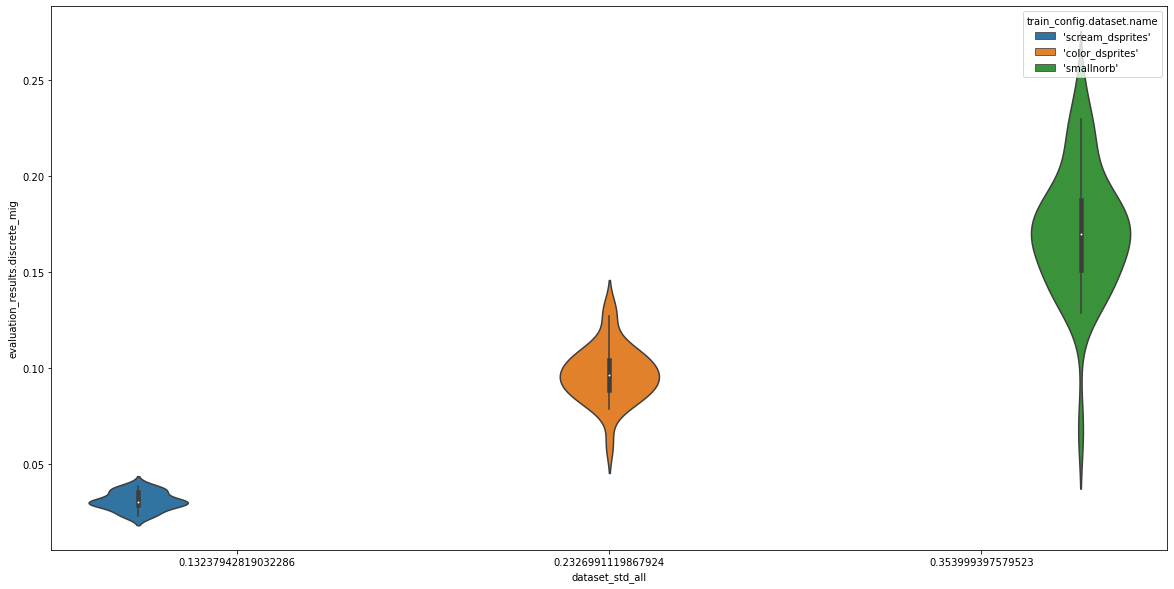

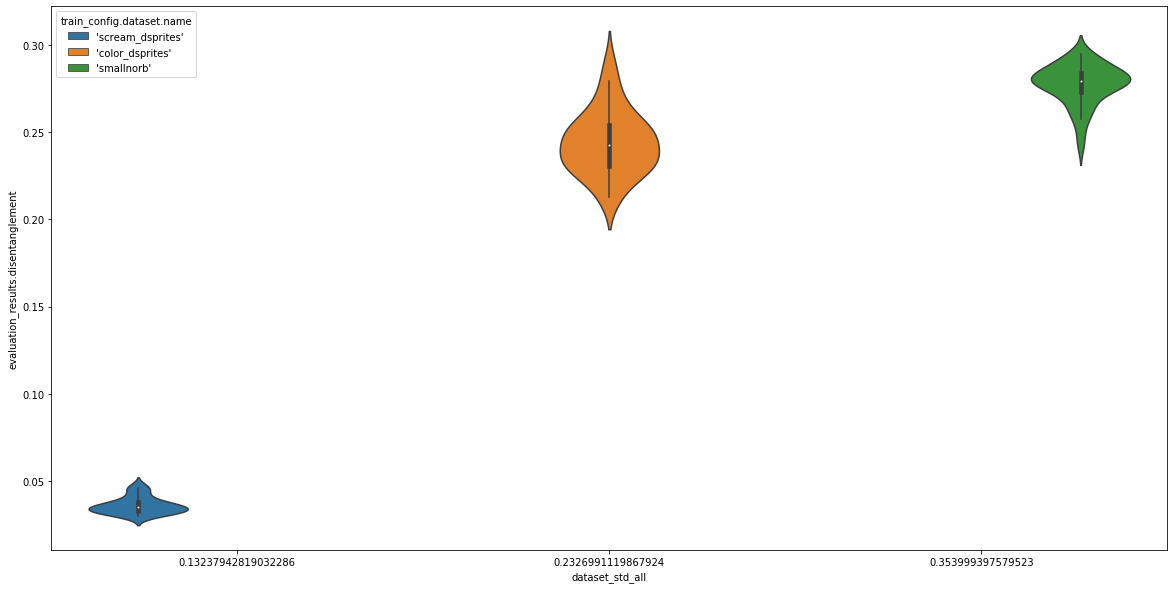

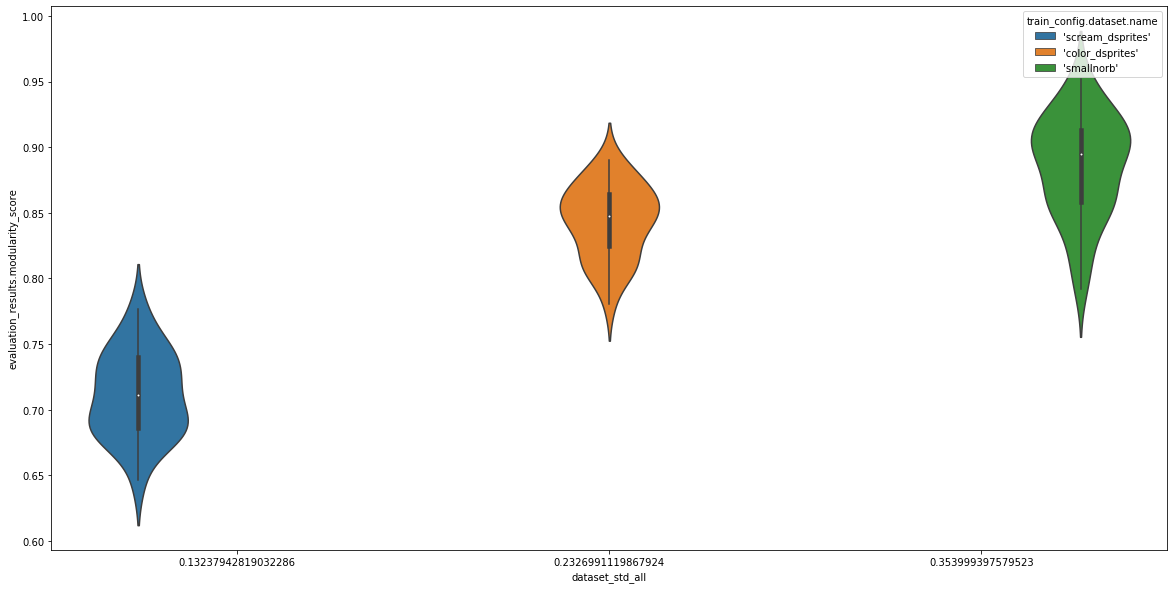

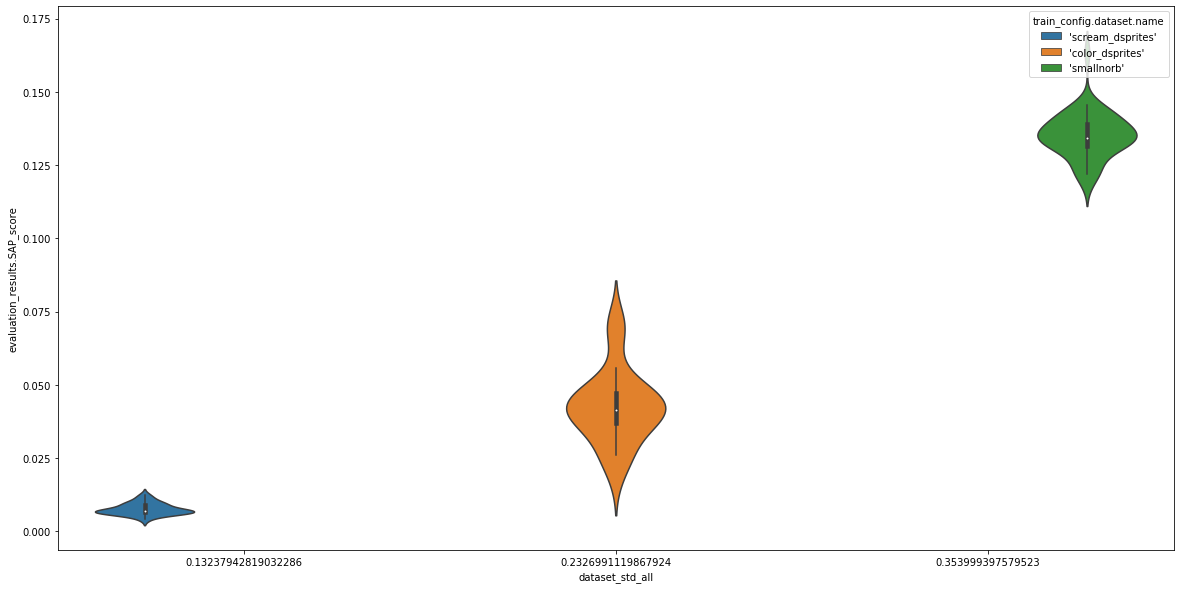

In [12]:
plot_violin('hnlpca_balanced_intrinsic')